In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('D:\DataScience\Assignment-2\kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:
model.fit(X, y)
model.coef_

#Hint: .fit()

array([269.46205468])

Mean squared error 57947526161.288376
R2 score (Coefficient of determination): 0.49670880166311393
Independent term: -32304.654721028113
Coefficient: [269.46205468]


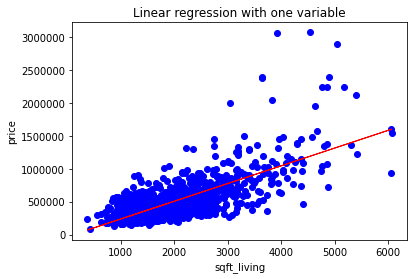

In [3]:
#b)

#Your code:
y_pred = model.predict(X)
print(f"Mean squared error {mean_squared_error(y_pred, y)}")
print(f"R2 score (Coefficient of determination): {model.score(X, y)}")
print(f"Independent term: {model.intercept_}")
print(f"Coefficient: {model.coef_}")

plt.scatter(X, y,  color='blue')
plt.plot(X, y_pred, color='red', linewidth=1)
plt.ticklabel_format(axis='both', style='plain')

plt.title('Linear regression with one variable')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

The blue dots kind of a polynomial relationship between price and sqft_living. The whole graph a visualization of a linear model fitted to the investigated data.

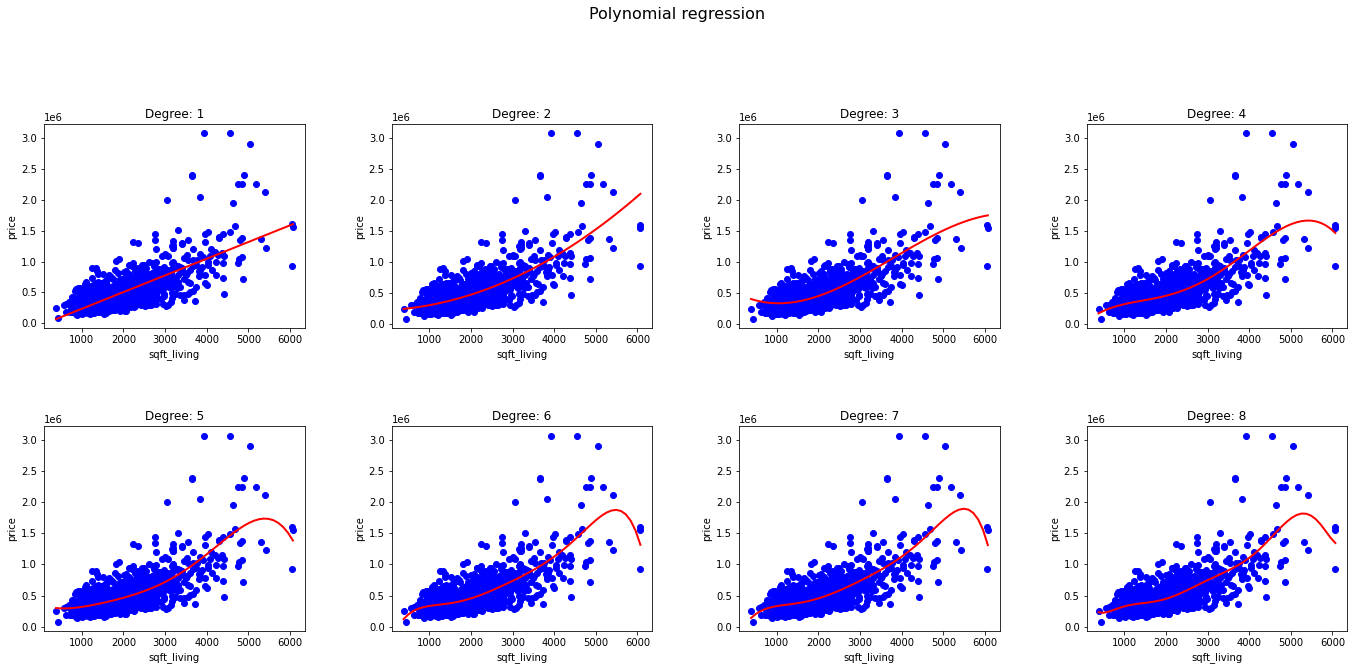

In [4]:
#c)

model = LinearRegression()
fig, axs = plt.subplots(2, 4)
mean_errs = []

for degree in range(1,9):
    
    poly = PolynomialFeatures(degree, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order, y)
    y_pred = model.predict(X_order)
    fig.set_figheight(10)
    fig.set_figwidth(20)
    
    df = pd.DataFrame({
        'x': np.squeeze(X),
        'y': np.squeeze(y_pred)
    })

    df = df.sort_values(by='x')
    axs[(degree-1)//4, (degree-1) %4].set_title(f'Degree: {degree}')
    axs[(degree-1)//4, (degree-1) %4].set_xlabel('sqft_living')
    axs[(degree-1)//4, (degree-1) %4].set_ylabel('price')
    axs[(degree-1)//4, (degree-1) %4].scatter(X, y,  color='blue')

    coefficients = np.polyfit(np.squeeze(X), np.squeeze(y), degree)
    poly_plot = np.poly1d(coefficients)
    x_new = np.linspace(X.min(), X.max())
    axs[(degree-1)//4, (degree-1) %4].plot(x_new, poly_plot(x_new), color='red', linewidth=2)
    mean_errs.append(mean_squared_error(y_pred, y))

    
    #Your code:
fig.suptitle("Polynomial regression", fontsize=16)
fig.tight_layout(pad=5.0)

The above plots represent how polynomials of degrees in the range from 1 to 8 fit the data.

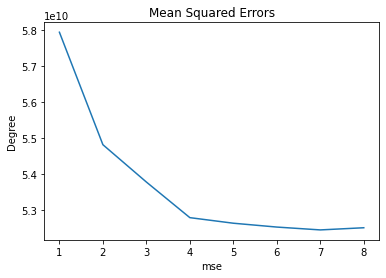

In [5]:
#Your code:
plt.title('Mean Squared Errors')
plt.ylabel('Degree')
plt.xlabel('mse')
plt.plot(range(1, 9), mean_errs)
plt.show()

Here plot represents how drastically the errors decrease within the growth of a polynomial degree.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

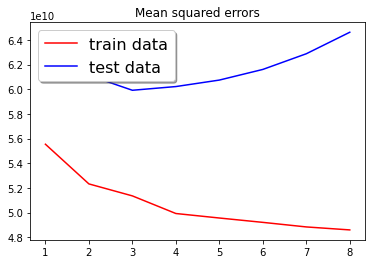

In [6]:
#a)
mean_errs_train = []
mean_errs_test = []
for degree in range(1, 9):
    poly = PolynomialFeatures(degree, include_bias = False)
    x_poly = poly.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.3, random_state=44)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    mean_errs_train.append(mean_squared_error(y_pred_train, y_train))
    mean_errs_test.append(mean_squared_error(y_pred_test, y_test))

plt.title("Mean squared errors")
plt.plot(range(1, 9), mean_errs_train, color='red', label='train data')
plt.plot(range(1, 9), mean_errs_test, color='blue', label='test data')
plt.legend(loc='upper left',
           fancybox=True, shadow=True, prop={'size': 16})

plt.show()

In fact, should we split the data, the test error starts to get higher, whereas the training error gets smaller. We can deem this phenomenon as an overfitting problem. The more our model gets accustomed to the training data, the more it disregards the overall trend.

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

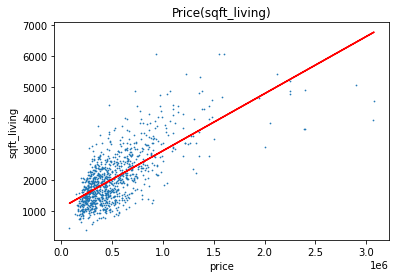

In [7]:
#a)

x = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model.fit(x,y)
model.score(x,y)

predictions = model.predict(x)

plt.title('Price(sqft_living)')
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.scatter(x, y, s=0.5)
plt.plot(x, predictions, c='red')
plt.show()

Here we can see an inverted relationship regarding the previous one, which frankly also resembles a polynomial relationship.

In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:
from sklearn.pipeline import Pipeline

X = house_df.drop(['waterfront', 'zipcode', 'yr_renovated','date', 'price', 'id', 'yr_built', 'bedrooms', 'view', 'floors', 'condition',
                  'sqft_lot15',], axis=1)

X = X.values.reshape(-1,len(X.columns))
y = house_df.price.values.reshape(-1)
X = (X - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

_model = Pipeline(steps=[
    ("poly", poly), 
    ("model", LinearRegression())
])

_model.fit(X_train, y_train)
_y_pred = _model.predict(X_test)


print(f'Mean squared error equals: {mean_squared_error(_y_pred, y_test)}')


Mean squared error equals: 48749274646.11548
Mean squared error equals: 31809694429.411396


In my model I added an R2 regularization combined with pre-conditioned data. I expanded the features set, and as the result, we can see a huge decrease in Mean squared error.